In [ ]:
import numpy as np
import argparse
import cv2
import os

# # Single image conversion, for evaluating image processing techniques

In [138]:
original =  cv2.imread('C:\\Users\\cheon\\MasterData\\raws\\LTurn\\sa175.png');
original

array([[[146, 142, 138],
        [147, 143, 139],
        [151, 147, 143],
        ...,
        [142, 140, 136],
        [141, 139, 135],
        [141, 139, 135]],

       [[147, 143, 139],
        [148, 144, 140],
        [149, 145, 141],
        ...,
        [141, 139, 135],
        [140, 138, 134],
        [140, 138, 134]],

       [[150, 146, 142],
        [149, 145, 141],
        [148, 144, 140],
        ...,
        [142, 140, 136],
        [141, 139, 135],
        [141, 139, 135]],

       ...,

       [[124, 122, 118],
        [123, 121, 117],
        [124, 122, 118],
        ...,
        [104, 102,  98],
        [104, 102,  98],
        [100,  98,  94]],

       [[121, 119, 115],
        [121, 119, 115],
        [121, 119, 115],
        ...,
        [104, 102,  98],
        [104, 102,  98],
        [100,  98,  94]],

       [[121, 119, 115],
        [121, 119, 115],
        [120, 118, 114],
        ...,
        [103, 101,  97],
        [104, 102,  98],
        [100,  98,  94]]

In [118]:
cv2.imshow('color image',original) 
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

In [139]:
original.width

AttributeError: 'numpy.ndarray' object has no attribute 'width'

In [114]:
width = 512
height = 512
dim = (width, height)
 
# resize image
resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (512, 512, 3)


In [154]:
# Resize
border_v = 0
border_h = 0
if (IMG_COL/IMG_ROW) >= (img.shape[0]/img.shape[1]):
    border_v = int((((IMG_COL/IMG_ROW)*img.shape[1])-img.shape[0])/2)
else:
    border_h = int((((IMG_ROW/IMG_COL)*img.shape[0])-img.shape[1])/2)
img = cv2.copyMakeBorder(img, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
img = cv2.resize(img, (IMG_ROW, IMG_COL))

In [155]:
testim = image_resize(original, height = 64)
cv2.imshow("IMG",testim)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [156]:
testim.shape

(64, 113, 3)

In [7]:
converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
blur = cv2.blur(converted,(5,5))


    

In [ ]:
data = img_to_array(converted)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)

In [17]:
skinMask = cv2.inRange(converted, lower, upper)
cv2.imshow('result', skinMask)
cv2.waitKey()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
skin = cv2.bitwise_and(resized, resized, mask = skinMask)
# show the skin in the image along with the mask
cv2.imshow("images", skinMask)

# show the skin in the image along with the mask
#cv2.imshow("Mask image", skinMask)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Data augmentation section with manual HSV values

In [15]:
#sa values
#lower = np.array([60, 50, 20], dtype = "uint8")
#upper = np.array([200, 255, 255], dtype = "uint8")

#sb values
#lower = np.array([90, 30, 20], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#sc values
#lower = np.array([30, 5,0], dtype = "uint8")
#upper = np.array([180, 255, 160], dtype = "uint8")

#sd values
#lower = np.array([20, 20, 100], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#se values
#lower = np.array([90, 70, 70], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

#sf values
#lower = np.array([60, 60, 60], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

In [170]:
#Function to convert images to mask , augmented using the binary mask instead

import numpy as np
import argparse
import cv2
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def massconvert(imageDir,filename,saveDir):
    original =  cv2.imread(imageDir);
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)

    # define the upper and lower boundaries of the HSV pixel
    # intensities to be considered 'skin'
    
    #sa values
    #lower = np.array([60, 50, 20], dtype = "uint8")
    #upper = np.array([200, 255, 255], dtype = "uint8")

    #sb values
    #lower = np.array([90, 30, 20], dtype = "uint8")
    #upper = np.array([180, 255, 200], dtype = "uint8")

    #sc values
    #lower = np.array([30, 5,0], dtype = "uint8")
    #upper = np.array([180, 255, 160], dtype = "uint8")

    #sd values
    #lower = np.array([20, 20, 100], dtype = "uint8")
    #upper = np.array([180, 255, 200], dtype = "uint8")

    #se values
    #lower = np.array([90, 70, 70], dtype = "uint8")
    #upper = np.array([180, 255, 255], dtype = "uint8")

    #sf values
    lower = np.array([60, 60, 60], dtype = "uint8")
    upper = np.array([180, 255, 255], dtype = "uint8")
    
    converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
    
    #Generate Binary Skin Mask
    skinMask = cv2.inRange(converted, lower, upper)
    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skinMask = cv2.erode(skinMask, kernel, iterations = 3)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    cv2.imwrite(saveDir + '\\PR' + filename , skinMask)
    
    #DATA AUGMENTATION LOOP
    data = img_to_array(skinMask)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.3)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    #print(saveDir + '\\PR' + filename)
    # generate samples and plot
    for i in range(15):
        # define subplot
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        cv2.imwrite(saveDir + '\\AUGPR' + str(i) + filename , image)
        #print(saveDir + '\\AUGPR' + filename)
        
        


In [171]:
#Function to loop through the subdirectory andd convert all images matching prefix(which indicatesa a certain user's feet type)

def conversionLoop(mainDir,subdirectory,prefix):
    saveDir = 'C:\\Users\Cheon\MasterData\\ktraining\\' + subdirectory
    print('Executing loop ' + subdirectory + ' PREFIX: ' + prefix)
    import os, re
    pfName = mainDir + subdirectory
    for i in os.listdir(pfName):
        #rint(os.path.join(pfName,i))
        if os.path.isfile(os.path.join(pfName,i)) and i.startswith(prefix):
            #print(pfName)
            massconvert(os.path.join(pfName,i),i,saveDir)
            #print(os.path.join(pfName,i))
   

In [172]:
#Execute conversion loop in all subdirectories
import scipy
from scipy import ndimage
dirList = ['Close','LForward','LTurn','Neutral','PointIn','PointOut','RForward','RTurn']
for i in dirList:
    conversionLoop('C:\\Users\Cheon\MasterData\\raws\\' ,i,'sf')
    print('Starting')
print('operation Complete')

Executing loop Close PREFIX: sf
Starting
Executing loop LForward PREFIX: sf
Starting
Executing loop LTurn PREFIX: sf
Starting
Executing loop Neutral PREFIX: sf
Starting
Executing loop PointIn PREFIX: sf
Starting
Executing loop PointOut PREFIX: sf
Starting
Executing loop RForward PREFIX: sf
Starting
Executing loop RTurn PREFIX: sf
Starting
operation Complete


In [173]:
for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(subdirectory)

NameError: name 'directory' is not defined

## Folder splitting and setting train, test, and validation datasets

In [174]:
import splitfolders
import splitfolders
splitfolders.ratio('C:\\Users\Cheon\MasterData\ktraining', output="C:\\Users\Cheon\MasterData\ktraining", seed=1337, ratio=(.8,0,.2)) 

Copying files: 13968 files [01:18, 178.89 files/s]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
batch_size = 16
STEPS_PER_EPOCH = batch_size
data_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\train'
test_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\test'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  image_size=(64, 64),
  subset="training",
  seed=123,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  image_size=(64, 64),
  subset="validation",
  seed=123,
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(64, 64),
  seed=123,
  batch_size=batch_size)

Found 11173 files belonging to 8 classes.
Using 7822 files for training.
Found 11173 files belonging to 8 classes.
Using 3351 files for validation.
Found 2795 files belonging to 8 classes.


## Model building section

In [12]:
#Getting classes (from the folder)
class_names = train_ds.class_names
print(class_names)



['Close', 'LForward', 'LTurn', 'Neutral', 'PointIn', 'PointOut', 'RForward', 'RTurn']


In [178]:
#Manual setting of class weights
class_weight = {0: 0.63,
                1: 0.63,
                2: 1,
                3: 0.3,
                4: 0.63,
                5: 0.46,
                6: 0.4,
                7: 0.63}

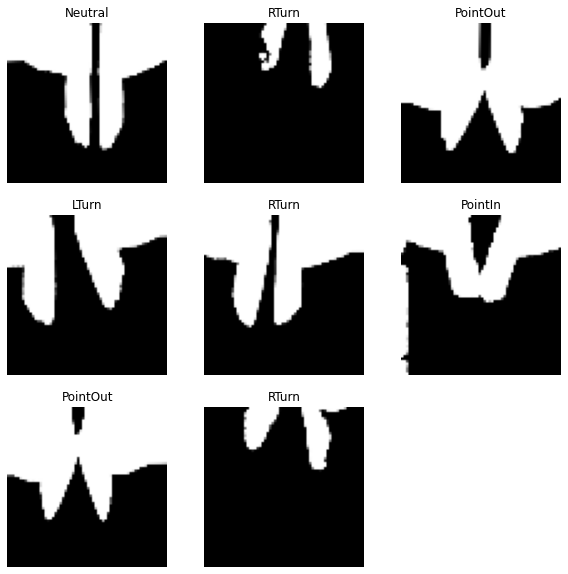

In [179]:
#Preview the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [180]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 64, 64, 3)
(16,)


In [16]:
#Setting custom Adam optimizer with degrading learning rate
from tensorflow.keras import layers
from tensorflow.keras import regularizers

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*10,
  decay_rate=1,
  staircase=False)


def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

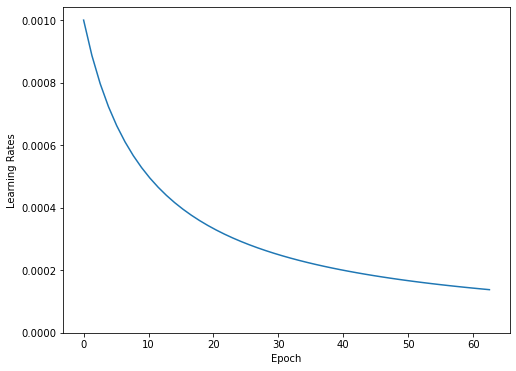

In [17]:
step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rates')

In [18]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [184]:
#Building the model (sequential model)
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])

In [186]:
#Compilation parameters
optimizer = get_optimizer()
model.compile(optimizer= get_optimizer(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='Sparse_Categorical_Crossentropy'),
                  'accuracy'])

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [187]:
#Model fitting
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  class_weight=class_weight  
)

Epoch 1/10
489/489 [==============================] - 43s 83ms/step - loss: 2.1967 - Sparse_Categorical_Crossentropy: 2.8839 - accuracy: 0.5908 - val_loss: 1.0421 - val_Sparse_Categorical_Crossentropy: 0.4816 - val_accuracy: 0.8451
Epoch 2/10
489/489 [==============================] - 33s 68ms/step - loss: 0.7088 - Sparse_Categorical_Crossentropy: 0.3490 - accuracy: 0.8839 - val_loss: 0.8329 - val_Sparse_Categorical_Crossentropy: 0.3037 - val_accuracy: 0.9075
Epoch 3/10
489/489 [==============================] - 34s 70ms/step - loss: 0.6039 - Sparse_Categorical_Crossentropy: 0.1884 - accuracy: 0.9394 - val_loss: 0.7634 - val_Sparse_Categorical_Crossentropy: 0.2586 - val_accuracy: 0.9275
Epoch 4/10
489/489 [==============================] - 34s 69ms/step - loss: 0.5507 - Sparse_Categorical_Crossentropy: 0.1255 - accuracy: 0.9592 - val_loss: 0.7313 - val_Sparse_Categorical_Crossentropy: 0.2471 - val_accuracy: 0.9287
Epoch 5/10
489/489 [==============================] - 33s 68ms/step - lo

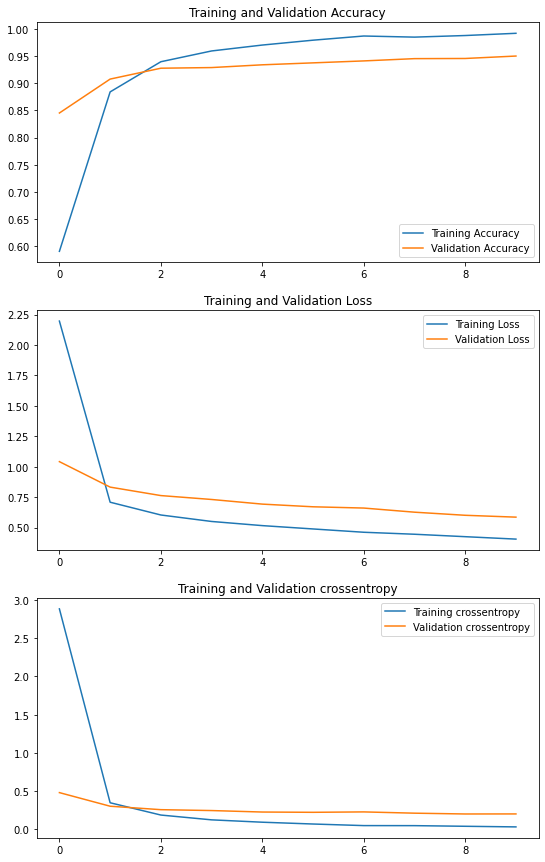

In [188]:
#Plotting the model's fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ce = history.history['Sparse_Categorical_Crossentropy']
val_ce = history.history['val_Sparse_Categorical_Crossentropy']



epochs_range = range(epochs)

plt.figure(figsize=(9, 15))
plt.subplot(3, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(3, 1, 3)
plt.plot(epochs_range, ce, label='Training crossentropy')
plt.plot(epochs_range, val_ce, label='Validation crossentropy')
plt.legend(loc='upper right')
plt.title('Training and Validation crossentropy')
plt.show()


In [189]:
print(history.history.keys())

dict_keys(['loss', 'Sparse_Categorical_Crossentropy', 'accuracy', 'val_loss', 'val_Sparse_Categorical_Crossentropy', 'val_accuracy'])


## Evaluation, saving and importing

In [190]:
# New test set using outside data ccollected aside from the ones use in training
batch_size = 16
STEPS_PER_EPOCH = batch_size
data_dir = 'C:\\Users\\Cheon\\MasterData\\newTestSet'
nts_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(64, 64),
  seed=123,
  batch_size=batch_size)

Found 130 files belonging to 8 classes.


In [193]:
#Evluating a single image
print("Evaluate on test data")
results = model.evaluate(nts_ds, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.9919 - Sparse_Categorical_Crossentropy: 0.5504 - accuracy: 0.8462
test loss, test acc: [0.9919439554214478, 0.550444483757019, 0.8461538553237915]


In [196]:
#Saving model
model.save('newmod5.h5')

In [4]:
#Test predicting individual models
import numpy as np
import argparse
import cv2
import os
test =  cv2.imread('C:\\Users\\cheon\\MasterData\\newTestSet\\LTurn\\PR2sbnt124.png');


In [2]:
modelNew = keras.models.load_model('newmod4.h5',compile=False)


In [20]:
print("Evaluate on test data")
modelNew.compile(optimizer= get_optimizer(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='Sparse_Categorical_Crossentropy'),
                  'accuracy'])



Evaluate on test data


In [21]:
#Accuracy, and loss 
results = modelNew.evaluate(test_ds, batch_size=32)
print("test loss, test acc:", results)

175/175 [==============================] - 3s 17ms/step - loss: 0.4432 - Sparse_Categorical_Crossentropy: 0.1835 - accuracy: 0.9553
test loss, test acc: [0.44317200779914856, 0.18345904350280762, 0.9552772641181946]


In [25]:
#Generating labels for confusion matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels


# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = modelNew.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)


1/1 [==============================] - 0s 22ms/step


In [32]:
#Recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall_score(predicted_labels, correct_labels, average='macro')


0.9632643653220869

In [33]:
#Precision
precision_score(predicted_labels, correct_labels, average='macro')

0.9553793614892987

In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_labels, correct_labels)

array([[275,   1,   0,   0,   5,   6,   0,   1],
       [  3, 294,   0,   1,   2,   0,   0,   0],
       [  0,   0, 181,   0,   0,   1,   0,   0],
       [  2,   5,   2, 574,  16,  10,  14,   7],
       [  0,   0,   0,   2, 269,   0,   0,   0],
       [  3,   0,   0,   0,   0, 353,   0,   3],
       [  2,   4,   0,  11,   3,   0, 450,   3],
       [  0,   0,   0,   4,   0,  14,   0, 274]], dtype=int64)